# Assignment No. 1 

####TASK 4####
####In task 4, you will use a pretained model to test on your dataset for classification####

####Import libraries####

In [ ]:
#Your code here
import glob
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import tensorflow as tf


In [ ]:
GOOGLE_COLAB = True
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


####Import dataset from your drive####

In [ ]:
path1 = glob.glob("/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/cats_and_dogs_filtered/train/cats/*.jpg")
cats_train = []
for img in path1: 
    pic = cv2.imread(img) 
    rgb = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    cats_train.append(rgb)


path2 = glob.glob("/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/cats_and_dogs_filtered/train/dogs/*.jpg")
dogs_train = []
for img in path2: 
    pic = cv2.imread(img) 
    rgb = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    dogs_train.append(rgb)


path3 = glob.glob("/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/cats_and_dogs_filtered/validation/cats/*.jpg")
cats_val = []
for img in path3: 
    pic = cv2.imread(img) 
    rgb = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    cats_val.append(rgb)

path4 = glob.glob("/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/cats_and_dogs_filtered/validation/dogs/*.jpg")
dogs_val = []
for img in path4: 
    pic = cv2.imread(img) 
    rgb = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    dogs_val.append(rgb)        

   

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/cats_and_dogs_filtered/train/",
                                                            shuffle=True,
                                                            batch_size=32,
                                                            image_size=(160, 160))
validation_data = validation_dataset = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/cats_and_dogs_filtered/validation/",
                                                                 shuffle=True,
                                                                 batch_size=32,
                                                                 image_size=(160,160))
# print(len(train_data), len(validation_data))
# print(len(cats_train),len(dogs_train), len(cats_val),len(dogs_val) )

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


####Print some images from your dataset####

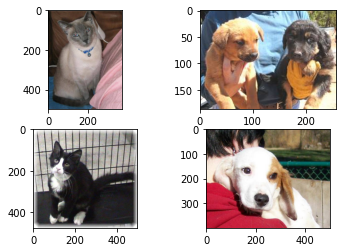

In [ ]:
#Your code here
class_names = train_data.class_names
plt.subplot(2,2,1)
plt.imshow(cats_train[np.random.randint(1000)])
plt.subplot(2,2,2)
plt.imshow(dogs_train[np.random.randint(1000)])
plt.subplot(2,2,3)
plt.imshow(cats_val[np.random.randint(500)])
plt.subplot(2,2,4)
plt.imshow(dogs_val[np.random.randint(500)])

####Split your datset into train validation and test####
There should be 26 validation batches and 6 test batches

In [ ]:
#Your code here
# split = np.array_split(train_data, 50)
# split1 = np.array_split(validation_data,26)
# split_train = []
# split_validation = []
# for i in split:
#    split_train.append(list(i))

# for j in split1:
#    split_validation.append(list(j))

validation_batches = tf.data.experimental.cardinality(validation_data)
test_data = validation_data.take(validation_batches // 5)
validation_data = validation_data.skip(validation_batches // 5)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_data))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_data))
# print(len(split_train),len(split_validation) )


Number of validation batches: 26
Number of test batches: 6


####Data Augmentation####
Perform some data augmentation techniques

In [ ]:
#Your code here
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.prefetch(buffer_size=AUTOTUNE)
test_data = test_data.prefetch(buffer_size=AUTOTUNE)

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

# augmented_image = data_augmentation(tf.expand_dims(cats_train[0], 0))
# plt.imshow(augmented_image[0] / 255)

####Rescale pixels from 0 to 255 to -1 to 1####

In [ ]:
#Your code here
# dummy = cats_train
# for i in range(len(cats_train)):
#   numpyArr = np.array(dummy[i])
#   resc = (2/(255*numpyArr))-1
#   dummy[i] = resc 
# print(cats_train[0], "Rescaled", dummy[0])  

from keras.applications.mobilenet_v2 import preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)


####Load pretrained model mobileNetV2####

In [ ]:
#Your code here
from keras.applications.mobilenet_v2 import MobileNetV2
IMG_SHAPE = (160,160) + (3,)
model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False,weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_data))
feature_batch = model(image_batch)
# print(feature_batch.shape)

####Freeze the convolution base####

In [ ]:
#Your code here
model.trainable = False

####Print model summary####

In [ ]:
#Your code here
model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

####Compile and fit the model and train for 20 epochs####

In [ ]:
#Your code here
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# loss0, accuracy0 = model.evaluate(validation_data)
history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)
    

####Evaluate the results(loss and accuracy) using graphs and plots####

In [ ]:
#Your code here
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
